In [358]:
#loading Dataset
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#EDA
from collections import Counter

#data preprocessing
from sklearn.preprocessing import StandardScaler
#data Splitting
from sklearn.model_selection import train_test_split

#data modelling
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#CombineallEnsembling
from mlxtend.classifier import StackingCVClassifier

1) Heart Disease Prediction

In [359]:
data = pd.read_csv("heart.csv")

In [360]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [361]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [363]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [364]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [365]:
y = data["target"]
x = data.drop('target', axis=1)

# First split: Split data into main set and test set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Second split: Split main set into training set and validation set
#X_train, X_validation, Y_train, Y_validation = train_test_split(X_main, Y_main, test_size=0.2, stratify=Y_main, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [366]:
print(Y_test.unique())
Counter(Y_train) #imported

[1 0]


Counter({1: 419, 0: 401})

In [367]:
#Logistic Regression Model
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(Y_test, lr_predict)
lr_acc_score = accuracy_score(Y_test, lr_predict)
print("Confusion Matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression on Test Set", lr_acc_score*100, '\n')
print("Classification Report (Test Set):")
print(classification_report(Y_test, lr_predict))

Confusion Matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression on Test Set 86.34146341463415 

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [368]:
#Random Forest Model
m2 = 'Random Forest Classifier'
rf = RandomForestClassifier(n_estimators=20, random_state=2, max_depth=5)
rf.fit(X_train, Y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(Y_test, rf_predicted)
rf_acc_score = accuracy_score(Y_test, rf_predicted)
print("Confusion Matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest", rf_acc_score*100, '\n')
print(classification_report(Y_test, rf_predicted))

Confusion Matrix
[[ 89   9]
 [  2 105]]


Accuracy of Random Forest 94.6341463414634 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [369]:
#Decision Tree
m3 = 'Decision Tree'
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=6)
dt.fit(X_train, Y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(Y_test, dt_predicted)
dt_acc_score = accuracy_score(Y_test, dt_predicted)
print("Confusion Matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of Decision Tree", dt_acc_score*100, '\n')
print(classification_report(Y_test, dt_predicted))

Confusion Matrix
[[95  3]
 [ 8 99]]


Accuracy of Decision Tree 94.6341463414634 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [370]:
svc = SVC(kernel='rbf', C=2)
svc.fit(X_train, Y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(Y_test, svc_predicted)
svc_acc_score = accuracy_score(Y_test, svc_predicted)
print("Confusion Matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier ", svc_acc_score*100, '\n')
print(classification_report(Y_test, svc_predicted))

Confusion Matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier  98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



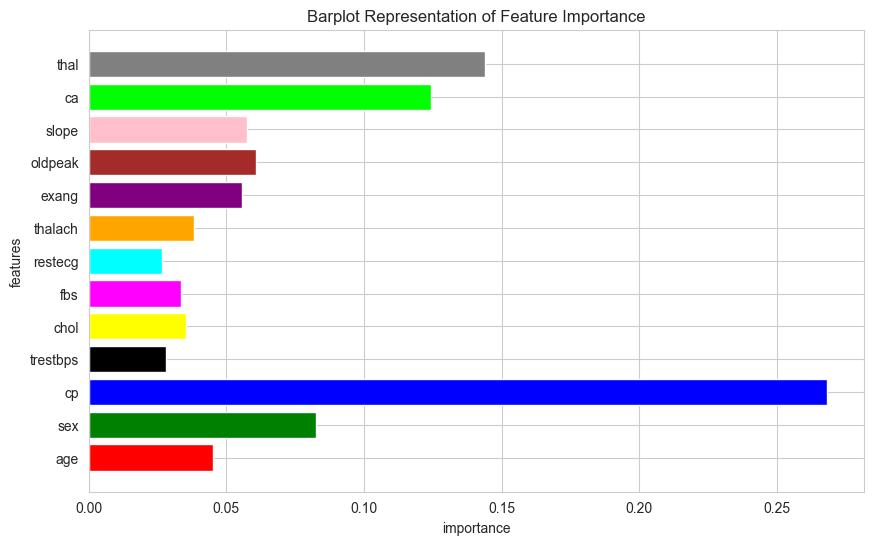

In [371]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
colors = ['red', 'green', 'blue', 'black', 'yellow', 'magenta', 'cyan', 
          'orange', 'purple', 'brown', 'pink', 'lime', 'grey']

imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                                        'exang', 'oldpeak', 'slope', 'ca', 'thal'], 
                            'Importance': xgb.feature_importances_})
plt.figure(figsize=(10, 6))
plt.title("Barplot Representation of Feature Importance")
plt.xlabel("importance")
plt.ylabel("features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=colors)
plt.show()

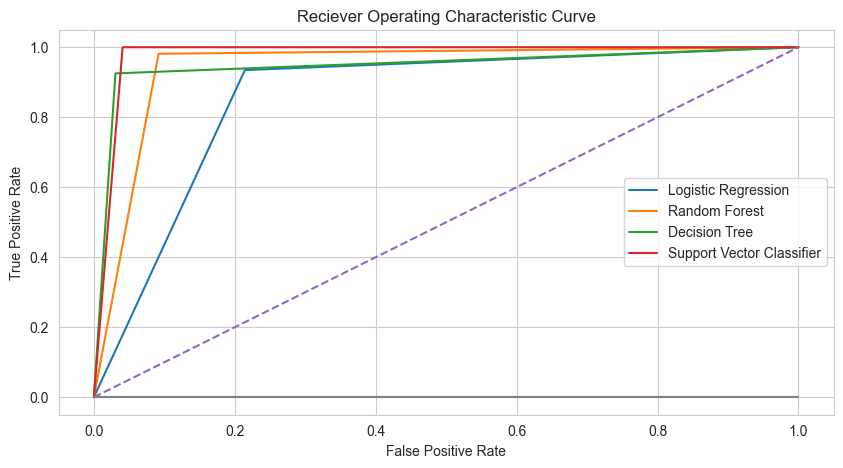

In [372]:
#graph shows accuracy wise plot

lr_false_positive_rate, lr_true_positive_rate, lr_threshold = roc_curve(Y_test, lr_predict)
rf_false_positive_rate, rf_true_positive_rate, rf_threshold = roc_curve(Y_test, rf_predicted)
dt_false_positive_rate, dt_true_positive_rate, dt_threshold = roc_curve(Y_test, dt_predicted)
svc_false_positive_rate, svc_true_positive_rate, svc_threshold = roc_curve(Y_test, svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciever Operating Characteristic Curve')
plt.plot(lr_false_positive_rate, lr_true_positive_rate, label='Logistic Regression')
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest')
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label='Decision Tree')
plt.plot(svc_false_positive_rate, svc_true_positive_rate, label='Support Vector Classifier')

plt.plot([0,1], ls='--')
plt.plot([0,0], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [373]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support vector Classifiers'], 
                            'Accuracy':[lr_acc_score*100, rf_acc_score*100, dt_acc_score*100, svc_acc_score*100]})

model_ev

,Model,Accuracy
0,Logistic Regression,86.341463
1,Random Forest,94.634146
2,Decision Tree,94.634146
3,Support vector Classifiers,98.048780


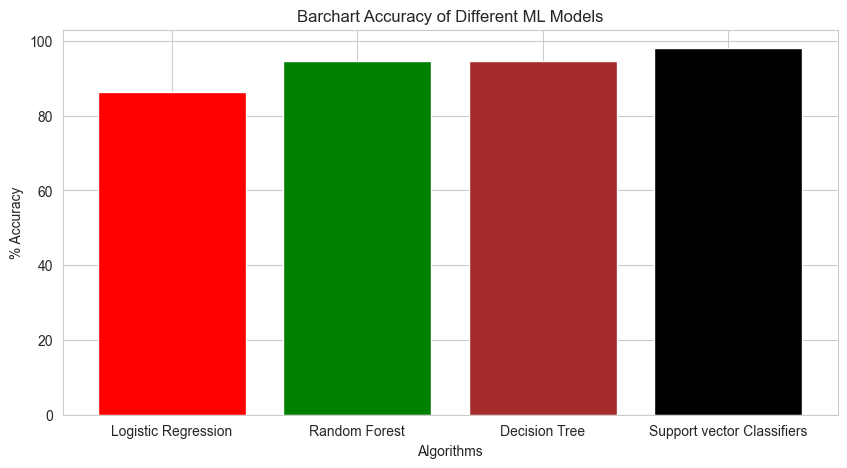

In [374]:
colors = ['red', 'green', 'brown', 'black', 'orange']
plt.figure(figsize=(10,5))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithms")
plt.ylabel("% Accuracy")
plt.bar(model_ev['Model'], model_ev['Accuracy'], color=colors)
plt.show()

It is observed that SVC has most Accuracy Amongst three followed by Decision tree and Random forest
Hence using SVC to predict the disease occurance.

In [375]:
Y_test

807    1
27     0
77     0
406    1
886    0
      ..
877    1
320    1
362    1
452    0
500    1
Name: target, Length: 205, dtype: int64

In [376]:
svc_predicted

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [377]:
Category=['No You Dont Have Heart Disease', 'Yes, You Have a Heart Disease..please Get All Tests Done']

In [378]:
custom_data_input = np.array([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])

In [379]:
std_data = scaler.transform(custom_data_input)
std_data

C:\Users\Prathamesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.29347783,  0.64895597, -0.91984324, -0.37683811, -0.6740592 ,
        -0.42209113,  0.92106058,  0.82351894, -0.7200823 , -0.03392063,
         0.97028605,  1.17427458,  1.10177143]])

In [380]:
max_acc = np.max([lr_acc_score*100, rf_acc_score*100, dt_acc_score*100, svc_acc_score*100])

As SVC(98%) has most accuracy Hence used this model for Prediction

In [381]:
custom_data_pred = svc.predict(std_data)

In [382]:
custom_data_pred

array([0])

In [383]:
print(Category[int(custom_data_pred)])

No You Dont Have Heart Disease


C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_62000\3363402338.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(Category[int(custom_data_pred)])


2) Diabetes Prediction

In [384]:
data1 = pd.read_csv("diabetes.csv")

In [385]:
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [386]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [387]:
data1.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [388]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [389]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [390]:
data1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [391]:
y1 = data1['Outcome']
x1 = data1.drop('Outcome', axis=1)

# First split: Split data into main set and test set
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size=0.20, random_state=0)

# Second split: Split main set into training set and validation set
#X_train, X_validation, Y_train, Y_validation = train_test_split(X_main, Y_main, test_size=0.2, stratify=Y_main, random_state=42)

scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [392]:
X_train1

array([[ 0.90832902,  0.91569367,  0.44912368, ...,  0.37852648,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.50667229,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683, ...,  2.54094063,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ..., -0.94927168,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.12937261,  0.24436264, ..., -0.26640405,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -4.07275877,
         0.52121586,  2.94889395]])

In [393]:
Y_train1

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [394]:
print(Y_test1.unique())
Counter(Y_train1) #imported

[1 0]


Counter({0: 393, 1: 221})

In [395]:
#Logistic Regression Model
lr1 = LogisticRegression()
model1 = lr1.fit(X_train1, Y_train1)
lr_predict1 = lr1.predict(X_test1)
lr_conf_matrix1 = confusion_matrix(Y_test1, lr_predict1)
lr_acc_score1 = accuracy_score(Y_test1, lr_predict1)
print("Confusion Matrix")
print(lr_conf_matrix1)
print("\n")
print("Accuracy of Logistic Regression on Test Set", lr_acc_score1*100, '\n')
print("Classification Report (Test Set):")
print(classification_report(Y_test1, lr_predict1))

Confusion Matrix
[[98  9]
 [18 29]]


Accuracy of Logistic Regression on Test Set 82.46753246753246 

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [396]:
#Random Forest Model
rf1 = RandomForestClassifier(n_estimators=20, random_state=2, max_depth=5)
rf1.fit(X_train1, Y_train1)
rf_predicted1 = rf1.predict(X_test1)
rf_conf_matrix1 = confusion_matrix(Y_test1, rf_predicted1)
rf_acc_score1 = accuracy_score(Y_test1, rf_predicted1)
print("Confusion Matrix")
print(rf_conf_matrix1)
print("\n")
print("Accuracy of Random Forest", rf_acc_score1*100, '\n')
print(classification_report(Y_test1, rf_predicted1))

Confusion Matrix
[[95 12]
 [19 28]]


Accuracy of Random Forest 79.87012987012987 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.70      0.60      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154



In [397]:
#Decision tree Model

dt1 = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=6)
dt1.fit(X_train1, Y_train1)
dt_predicted1 = dt1.predict(X_test1)
dt_conf_matrix1 = confusion_matrix(Y_test1, dt_predicted1)
dt_acc_score1 = accuracy_score(Y_test1, dt_predicted1)
print("Confusion Matrix")
print(dt_conf_matrix1)
print("\n")
print("Accuracy of Decision Tree", dt_acc_score1*100, '\n')
print(classification_report(Y_test1, dt_predicted1))

Confusion Matrix
[[93 14]
 [27 20]]


Accuracy of Decision Tree 73.37662337662337 

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       107
           1       0.59      0.43      0.49        47

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.72      0.73      0.72       154



In [398]:
svc1 = SVC(kernel='rbf', C=2)
svc1.fit(X_train1, Y_train1)
svc_predicted1 = svc1.predict(X_test1)
svc_conf_matrix1 = confusion_matrix(Y_test1, svc_predicted1)
svc_acc_score1 = accuracy_score(Y_test1, svc_predicted1)
print("Confusion Matrix")
print(svc_conf_matrix1)
print("\n")
print("Accuracy of Support Vector Classifier ", svc_acc_score1*100, '\n')
print(classification_report(Y_test1, svc_predicted1))

Confusion Matrix
[[95 12]
 [21 26]]


Accuracy of Support Vector Classifier  78.57142857142857 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       107
           1       0.68      0.55      0.61        47

    accuracy                           0.79       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154



In [399]:
data1.select_dtypes(include="number").columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

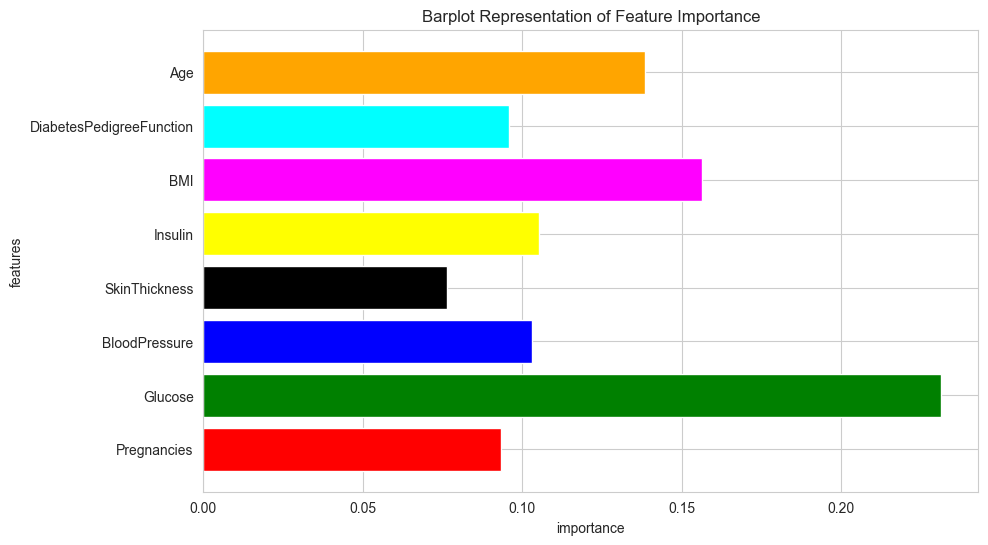

In [400]:
xgb = XGBClassifier()
xgb.fit(X_train1, Y_train1)


colors = ['red', 'green', 'blue', 'black', 'yellow', 'magenta', 'cyan', 
          'orange', 'purple', 'brown', 'pink', 'lime', 'grey']

imp_feature = pd.DataFrame({'Feature': ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'], 
                            'Importance': xgb.feature_importances_})
plt.figure(figsize=(10, 6))
plt.title("Barplot Representation of Feature Importance")
plt.xlabel("importance")
plt.ylabel("features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=colors)
plt.show()

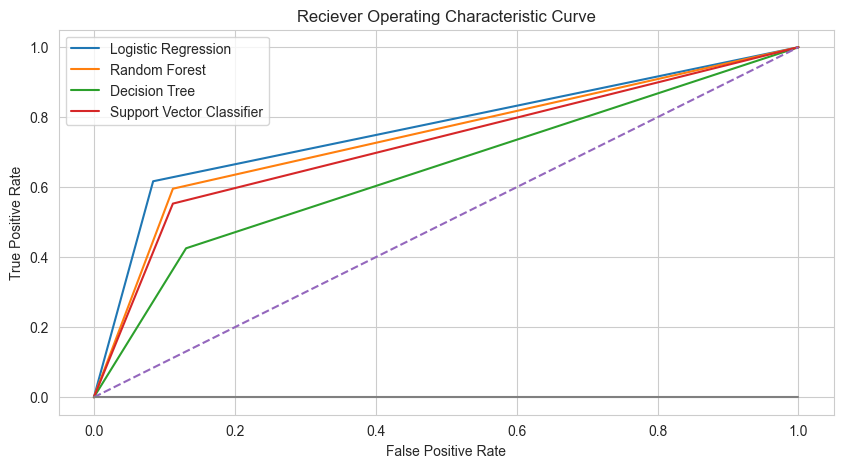

In [401]:
lr_false_positive_rate, lr_true_positive_rate, lr_threshold = roc_curve(Y_test1, lr_predict1)
rf_false_positive_rate, rf_true_positive_rate, rf_threshold = roc_curve(Y_test1, rf_predicted1)
dt_false_positive_rate, dt_true_positive_rate, dt_threshold = roc_curve(Y_test1, dt_predicted1)
svc_false_positive_rate, svc_true_positive_rate, svc_threshold = roc_curve(Y_test1, svc_predicted1)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciever Operating Characteristic Curve')
plt.plot(lr_false_positive_rate, lr_true_positive_rate, label='Logistic Regression')
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest')
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label='Decision Tree')
plt.plot(svc_false_positive_rate, svc_true_positive_rate, label='Support Vector Classifier')

plt.plot([0,1], ls='--')
plt.plot([0,0], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [402]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support vector Classifiers'], 
                            'Accuracy':[lr_acc_score1*100, rf_acc_score1*100, dt_acc_score1*100, svc_acc_score1*100]})

model_ev

,Model,Accuracy
0,Logistic Regression,82.467532
1,Random Forest,79.870130
2,Decision Tree,73.376623
3,Support vector Classifiers,78.571429


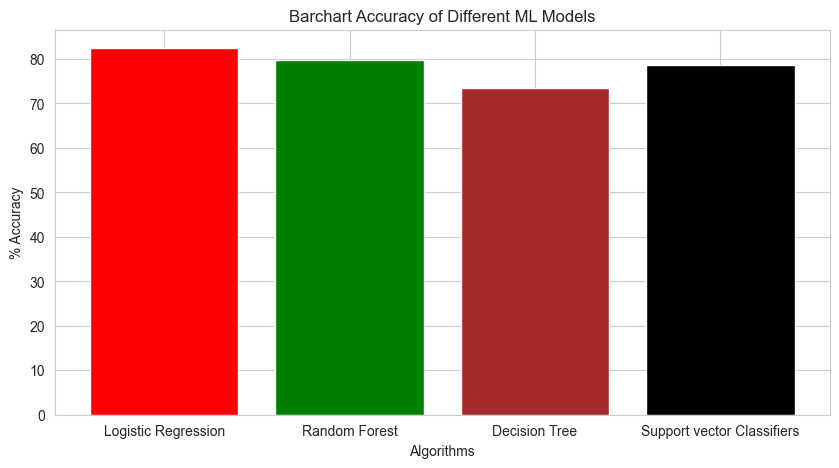

In [403]:
colors = ['red', 'green', 'brown', 'black', 'orange']
plt.figure(figsize=(10,5))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithms")
plt.ylabel("% Accuracy")
plt.bar(model_ev['Model'], model_ev['Accuracy'], color=colors)
plt.show()

In [404]:
lr_predict1

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [405]:
Category1=['No You Dont Have Diabetes', 'Yes, You Have Diabetes..please Get All Tests Done']

In [406]:
custom_data_input1 = np.array([[10,101,76,48,180,32.9,0.171,3]])

In [407]:
std_data1 = scaler.transform(custom_data_input1)
std_data1

C:\Users\Prathamesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.78021128, -0.62597168,  0.34674316,  1.70680537,  0.83361703,
         0.08767546, -0.8874812 , -2.54818404]])

In [408]:
max_acc1 = np.max([lr_acc_score1*100, rf_acc_score1*100, dt_acc_score1*100, svc_acc_score1*100])

logistic regression model has most accuracy(82%)hence used this model

In [409]:
 custom_data_pred1 = lr1.predict(std_data1)

custom_data_pred1

array([0])

In [410]:
print(Category1[int(custom_data_pred1)])

No You Dont Have Diabetes


C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_62000\3817369302.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(Category1[int(custom_data_pred1)])


3) Parkinsons Prediction

In [411]:
data2 = pd.read_csv("parkinsons.csv")

In [412]:
data2

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [413]:
data2.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [414]:
data2.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [415]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [416]:
data2.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [417]:
data2.duplicated().sum()

np.int64(0)

In [418]:
data2.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [419]:
data2['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [420]:
x2 = data2.drop(columns=['name','status'],axis=1)
y2 = data2['status']

# First split: Split data into main set and test set
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x2, y2, test_size=0.20, random_state=2)

# Second split: Split main set into training set and validation set
#X_train, X_validation, Y_train, Y_validation = train_test_split(X_main, Y_main, test_size=0.2, stratify=Y_main, random_state=42)

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [421]:
Y_train2

123    1
160    1
94     1
57     1
41     1
      ..
43     0
22     1
72     1
15     1
168    0
Name: status, Length: 156, dtype: int64

In [422]:
Y_test2

10     1
79     1
164    1
142    1
186    0
133    1
35     0
137    1
25     1
2      1
12     1
128    1
144    1
3      1
48     0
29     1
14     1
119    1
6      1
23     1
108    1
143    1
129    1
174    0
45     0
120    1
173    0
125    1
9      1
163    1
54     1
13     1
109    1
194    0
78     1
114    1
44     0
82     1
158    1
Name: status, dtype: int64

In [423]:
print(Y_test2.unique())
Counter(Y_train2) #imported

[1 0]


Counter({1: 116, 0: 40})

In [424]:
#Logistic Regression Model
lr2 = LogisticRegression()
model2 = lr2.fit(X_train2, Y_train2)
lr_predict2 = lr2.predict(X_test2)
lr_conf_matrix2 = confusion_matrix(Y_test2, lr_predict2)
lr_acc_score2 = accuracy_score(Y_test2, lr_predict2)
print("Confusion Matrix")
print(lr_conf_matrix2)
print("\n")
print("Accuracy of Logistic Regression on Test Set", lr_acc_score2*100, '\n')
print("Classification Report (Test Set):")
print(classification_report(Y_test2, lr_predict2))

Confusion Matrix
[[ 5  3]
 [ 4 27]]


Accuracy of Logistic Regression on Test Set 82.05128205128204 

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



In [425]:
#Random Forest Model
rf2 = RandomForestClassifier(n_estimators=20, random_state=2, max_depth=5)
rf2.fit(X_train2, Y_train2)
rf_predicted2 = rf2.predict(X_test2)
rf_conf_matrix2 = confusion_matrix(Y_test2, rf_predicted2)
rf_acc_score2 = accuracy_score(Y_test2, rf_predicted2)
print("Confusion Matrix")
print(rf_conf_matrix2)
print("\n")
print("Accuracy of Random Forest", rf_acc_score2*100, '\n')
print(classification_report(Y_test2, rf_predicted2))

Confusion Matrix
[[ 6  2]
 [ 6 25]]


Accuracy of Random Forest 79.48717948717949 

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.93      0.81      0.86        31

    accuracy                           0.79        39
   macro avg       0.71      0.78      0.73        39
weighted avg       0.84      0.79      0.81        39



In [426]:
#Decision tree Model

dt2 = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=6)
dt2.fit(X_train2, Y_train2)
dt_predicted2 = dt2.predict(X_test2)
dt_conf_matrix2 = confusion_matrix(Y_test2, dt_predicted2)
dt_acc_score2 = accuracy_score(Y_test2, dt_predicted2)
print("Confusion Matrix")
print(dt_conf_matrix2)
print("\n")
print("Accuracy of Decision Tree", dt_acc_score2*100, '\n')
print(classification_report(Y_test2, dt_predicted2))

Confusion Matrix
[[ 7  1]
 [11 20]]


Accuracy of Decision Tree 69.23076923076923 

              precision    recall  f1-score   support

           0       0.39      0.88      0.54         8
           1       0.95      0.65      0.77        31

    accuracy                           0.69        39
   macro avg       0.67      0.76      0.65        39
weighted avg       0.84      0.69      0.72        39



In [427]:
#Support Vector Classifier
svc2 = SVC(kernel='rbf', C=2)
svc2.fit(X_train2, Y_train2)
svc_predicted2 = svc2.predict(X_test2)
svc_conf_matrix2 = confusion_matrix(Y_test2, svc_predicted2)
svc_acc_score2 = accuracy_score(Y_test2, svc_predicted2)
print("Confusion Matrix")
print(svc_conf_matrix2)
print("\n")
print("Accuracy of Support Vector Classifier ", svc_acc_score2*100, '\n')
print(classification_report(Y_test2, svc_predicted2))

Confusion Matrix
[[ 6  2]
 [ 2 29]]


Accuracy of Support Vector Classifier  89.74358974358975 

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.94      0.94      0.94        31

    accuracy                           0.90        39
   macro avg       0.84      0.84      0.84        39
weighted avg       0.90      0.90      0.90        39



In [428]:
data2.select_dtypes(include="number").columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

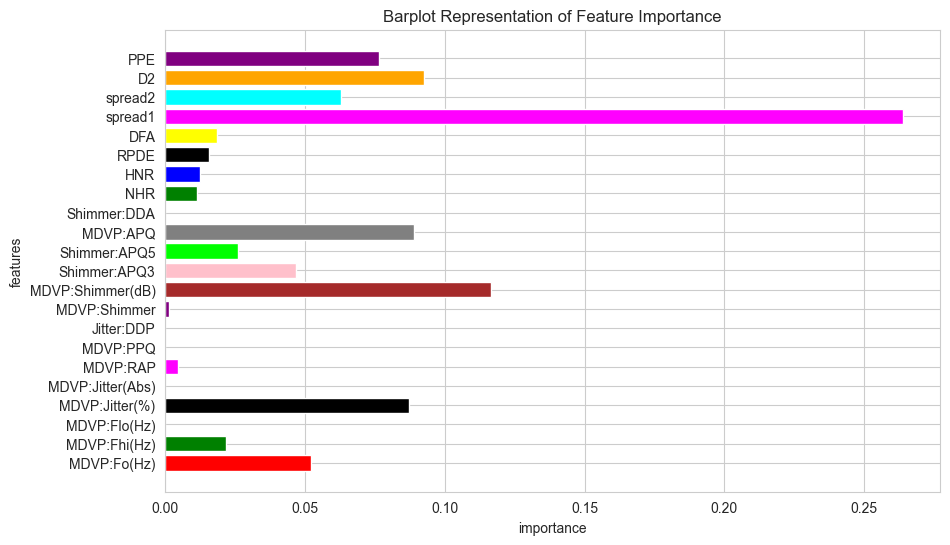

In [429]:
xgb = XGBClassifier()
xgb.fit(X_train2, Y_train2)


colors = ['red', 'green', 'blue', 'black', 'yellow', 'magenta', 'cyan', 
          'orange', 'purple', 'brown', 'pink', 'lime', 'grey']

imp_feature = pd.DataFrame({'Feature':['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'], 
                            'Importance': xgb.feature_importances_})
plt.figure(figsize=(10, 6))
plt.title("Barplot Representation of Feature Importance")
plt.xlabel("importance")
plt.ylabel("features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=colors)
plt.show()

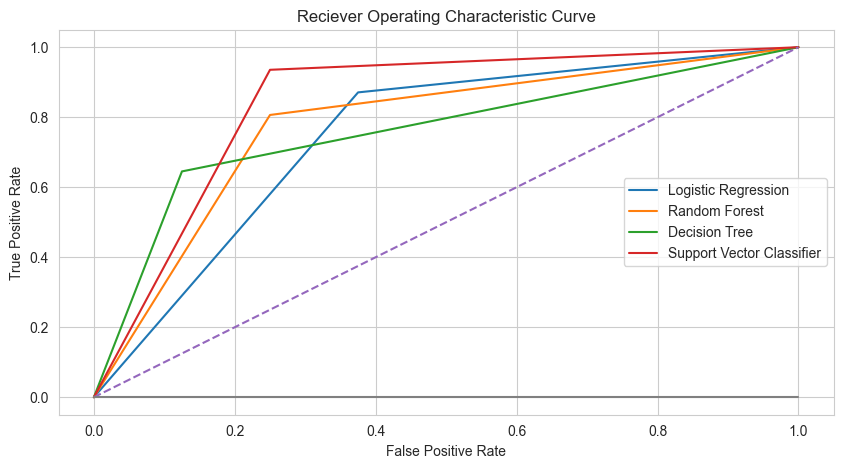

In [430]:
lr_false_positive_rate, lr_true_positive_rate, lr_threshold = roc_curve(Y_test2, lr_predict2)
rf_false_positive_rate, rf_true_positive_rate, rf_threshold = roc_curve(Y_test2, rf_predicted2)
dt_false_positive_rate, dt_true_positive_rate, dt_threshold = roc_curve(Y_test2, dt_predicted2)
svc_false_positive_rate, svc_true_positive_rate, svc_threshold = roc_curve(Y_test2, svc_predicted2)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciever Operating Characteristic Curve')
plt.plot(lr_false_positive_rate, lr_true_positive_rate, label='Logistic Regression')
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest')
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label='Decision Tree')
plt.plot(svc_false_positive_rate, svc_true_positive_rate, label='Support Vector Classifier')

plt.plot([0,1], ls='--')
plt.plot([0,0], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [431]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support vector Classifiers'], 
                            'Accuracy_Training_data':[lr_acc_score2*100, rf_acc_score2*100, dt_acc_score2*100, svc_acc_score2*100]})

model_ev

,Model,Accuracy_Training_data
0,Logistic Regression,82.051282
1,Random Forest,79.487179
2,Decision Tree,69.230769
3,Support vector Classifiers,89.743590


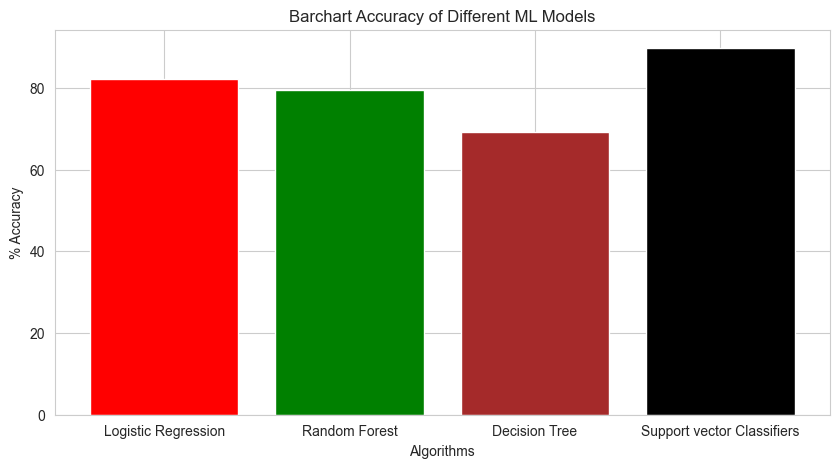

In [432]:
colors = ['red', 'green', 'brown', 'black', 'orange']
plt.figure(figsize=(10,5))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithms")
plt.ylabel("% Accuracy")
plt.bar(model_ev['Model'], model_ev['Accuracy_Training_data'], color=colors)
plt.show()

In [433]:
svc_predicted2

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [434]:
Category2=['No You Dont Have Parkinsons Disease', 'Yes, You Have Parkinsons Disease..please Get All Tests Done']

In [435]:
custom_data_input2 = np.array([[119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
]])

In [436]:
std_data2 = scaler.transform(custom_data_input2)
std_data2

C:\Users\Prathamesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.91186944, -0.4688937 , -0.97396062,  0.25738655,  0.68824571,
         0.06892818,  0.65934722,  0.06783417,  0.6266817 ,  0.61545096,
         0.49899036,  0.99256098,  0.23509451,  0.49868698, -0.12167334,
        -0.12718538, -0.7706625 ,  1.78762036,  0.75957802,  0.48353281,
        -0.23060987,  0.8187851 ]])

In [437]:
max_acc2 = np.max([lr_acc_score2*100, rf_acc_score2*100, dt_acc_score2*100, svc_acc_score2*100])

SVC Has Most Accuracy(89%) Hence using SVC Model for Prediction.

In [438]:
custom_data_pred2 = svc2.predict(std_data2)

custom_data_pred2

array([1])

In [439]:
print(Category2[int(custom_data_pred2)])

Yes, You Have Parkinsons Disease..please Get All Tests Done


C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_62000\4171721548.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(Category2[int(custom_data_pred2)])
